## 선형회귀분석 전 산점도와 기본가정 만족시키기
##### **과정에서 y정규분포에 이상치로 정규분포가 따르지 않음을 발견함/ 그래서 제거하는 과정 포함되어있음**

----

### **<목차>**
1. 정규분포 확인하기
   1) 종속변수가 정규분포를 따르는지?
   2) 독립변수가 정규분포를 따르는지?
   3) 독립변수 종속변수 결합이 정규분포를 따르는지? -> 다변량정규분포
   4) 잔차가 정규분포를 따르는지
2. 선형성확인하기  - 종속변수와 독립변수사이 산점도 찍어보기

-----------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##### 1. 종속변수 정규성 확인하기

In [3]:
data = pd.read_csv('./data/더미생성전_시가총액까지합친거.csv')
data.drop(['Unnamed: 0.1','Unnamed: 0'] , axis = 1 , inplace = True)

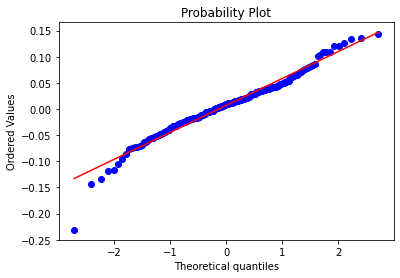

In [4]:
# 전월대비등락률 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(data['전월대비 등락률'],plot=plt) 
plt.show()

In [5]:
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.03035980% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000001% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


#### -> 정규성 안따름 / 그래서 이상치 제거해보려함

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) m

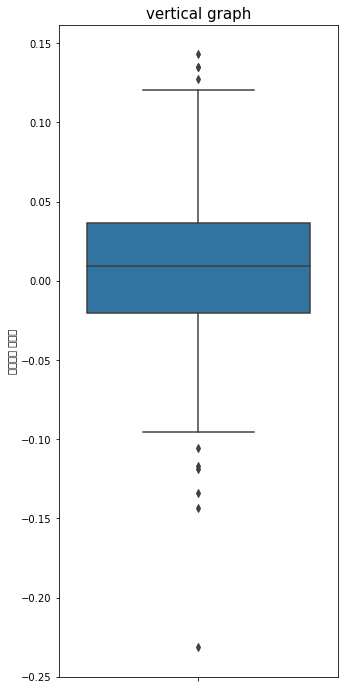

In [6]:
# box-plot 그래프 
plt.figure(figsize = (5,12))
import seaborn as sns

sns.boxplot(y='전월대비 등락률', data = data )
plt.title('vertical graph', size = 15)
plt.show()

In [4]:
import numpy as np
#이상치 제거 함수 get_outlier 만들기

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(data['전월대비 등락률'].values, 25)
  quantile_75 = np.percentile(data['전월대비 등락률'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = data['전월대비 등락률'][ (data['전월대비 등락률'] < lowest) | (data['전월대비 등락률'] > highest) ].index
  return outlier_idx

In [5]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='전월대비 등락률', weight=1.5)
data['전월대비 등락률'].loc[outlier_idx]


8      0.127090
36    -0.143612
45    -0.231344
50     0.134737
51     0.135211
79    -0.118647
165   -0.133748
182   -0.116945
190    0.142995
204   -0.105556
Name: 전월대비 등락률, dtype: float64

In [31]:
#가장 낮은 -0.23행 
data['전월대비 등락률'][45]

-0.2313439957216467

In [8]:
#2008년 금융위기
#2008년 9월15일 리먼브라더스가 파산 신청해서 일주일 뒤 파산하기로 결정.  
#9월까지(1450)유지선이 1000 밑으로 깨짐 


outlier = data.loc[45]
print(outlier)

날짜           2008-10-31
date            2008 10
년도                 2008
월                    10
종가          1113.060059
전월대비 등락률      -0.231344
외국인순매수           -39671
개인순매수             18798
기관순매수             22126
요일               Friday
동행지수              100.4
동행label               1
등락률label              0
시가총액대비             29.8
Name: 45, dtype: object


In [6]:
#가장 낮은 -0.23행 삭제 해보기
data_drop=data.drop(index= [45], axis=0)
data_drop

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


In [52]:
data_drop

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


#### 이상치 제거한 data_drop으로 정규성 검증

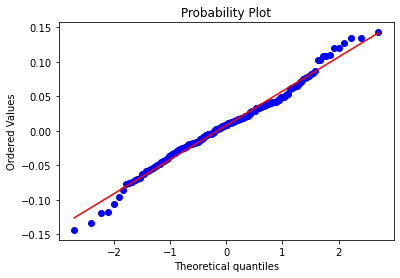

In [33]:
# 전월대비등락률 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(data_drop['전월대비 등락률'],plot=plt) 
plt.show()

In [34]:
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data_drop['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data_drop['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  5.56201749% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  11.46958969% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


---> 이상치 인덱스 45번 제거하니 정규성 만족!!!!!!

### 인덱스 45행 제거하고 독립변수도 다시 정규성 보기

In [7]:
#데이터 부르기
finish = pd.read_csv('./data/더미생성전_시가총액까지합친거.csv')
finish.drop(['Unnamed: 0.1','Unnamed: 0'] , axis = 1 , inplace = True)
finish #207개 행 

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


In [8]:
#가장 낮은 -0.23행 삭제 해보기
finish_drop=finish.drop(index= [45], axis=0)
finish_drop

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


In [10]:
finish_drop.to_csv('코스피등락률정규성만족_206행.csv')

In [38]:
# 외국인순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(finish_drop['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(finish_drop['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  83.58997107% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  82.51919129% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


In [39]:
# 기관순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(finish_drop['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(finish_drop['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  2.13014670% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  51.78843613% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


In [40]:
# 개인순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(finish_drop['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(finish_drop['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  83.38821530% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  97.40149796% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


#### **산점도** 
* 종속변수 - 등락률 과  독립변수 - 외국인/개인/기관 순매수

<Figure size 1080x648 with 0 Axes>

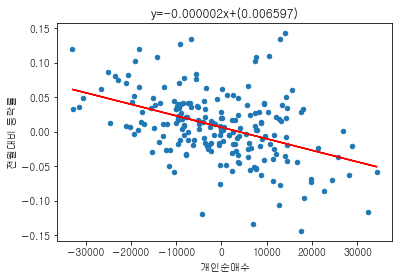

In [49]:
## 개인 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
finish_drop.plot(kind='scatter', x='개인순매수', y='전월대비 등락률')
fit_weight = np.polyfit(finish_drop['개인순매수'], finish_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(finish_drop['개인순매수'], trend_f(finish_drop['개인순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

<Figure size 1080x648 with 0 Axes>

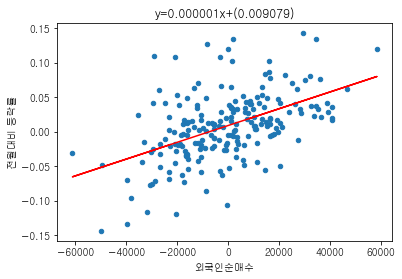

In [50]:
## 외국인 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
finish_drop.plot(kind='scatter', x='외국인순매수', y='전월대비 등락률')
fit_weight = np.polyfit(finish_drop['외국인순매수'], finish_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(finish_drop['외국인순매수'], trend_f(finish_drop['외국인순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

<Figure size 1080x648 with 0 Axes>

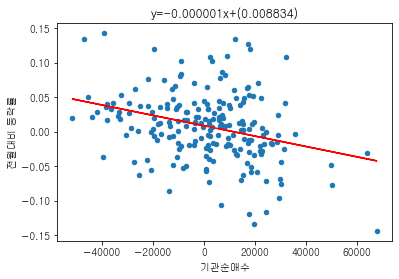

In [51]:
## 기관 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
finish_drop.plot(kind='scatter', x='기관순매수', y='전월대비 등락률')
fit_weight = np.polyfit(finish_drop['기관순매수'], finish_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(finish_drop['기관순매수'], trend_f(finish_drop['기관순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

----

In [53]:
finish_drop

,전월대비 등락률,외국인순매수,개인순매수,기관순매수,동행지수,동행label,시가총액대비
0,0.041053,8538,-9523,984,99.0,0,42.9
1,0.084336,14654,-5725,-8928,98.7,0,42.7
2,-0.045167,-20741,3820,16920,98.8,0,42.2
3,-0.056313,-3243,2291,955,98.6,0,41.9
4,0.064644,1048,-18304,17254,98.7,0,41.7
...,...,...,...,...,...,...,...
202,-0.044323,11342,16641,-27380,101.1,1,33.0
203,0.048834,15250,-30452,15846,101.8,1,33.5
204,-0.105556,-389,12674,6687,102.4,1,32.7
205,0.013457,-6207,-10135,-3629,102.6,1,32.4


#### **히트맵** 
* 최종 데이터 셋으로 히트맵 다시 돌리기

In [43]:
finish_drop.columns

Index(['날짜', 'date', '년도', '월', '종가', '전월대비 등락률', '외국인순매수', '개인순매수', '기관순매수',
       '요일', '동행지수', '동행label', '등락률label', '시가총액대비'],
      dtype='object')

In [44]:
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot:>

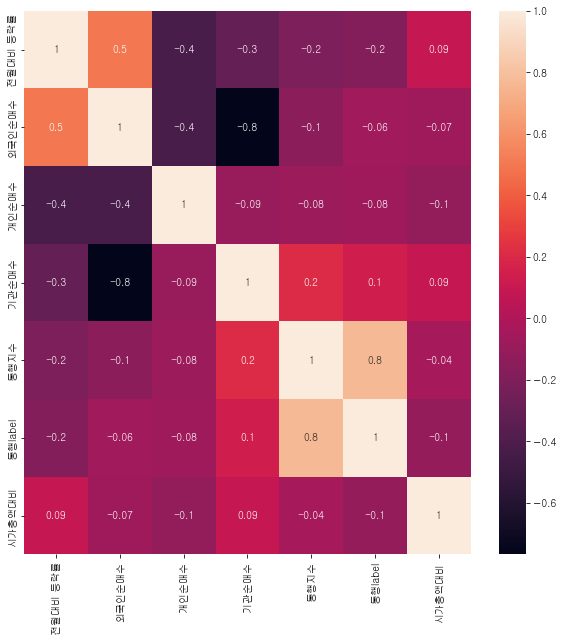

In [45]:
finish_drop.drop(['날짜',	'date',	'년도',	'월','종가','요일','등락률label'], axis = 1, inplace = True)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

corr=finish_drop.corr() # 상관관계 리턴 
corr

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g') 

#### **변수 선택법**

#### **회귀식 도출**